In [2]:
import os
from matplotlib import pyplot as plt
import IPython.display as ipd
import pandas as pd
from pydub import AudioSegment
import ffprobe
import ffmpeg
import numpy as np
import wave
import os
from pydub import AudioSegment
import numpy as np
from teager_py import Teager
import pydub

%matplotlib inline


Bad key text.latex.preview in file /software/python-anaconda-2020.11-el8-x86_64/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /software/python-anaconda-2020.11-el8-x86_64/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /software/python-anaconda-2020.11-el8-x86_64/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig

In [4]:
base_path='/project/graziul/data/'
feed='Zone 1'
date='2018_08_12'
filepath=base_path+feed.replace(' ','')+'/'+date
infiles = os.listdir(filepath)

In [5]:
import os
infile_path = []
for file in infiles:
    if (file.endswith(".mp3")) and file.startswith("2018") :       
        infile_path.append(os.path.join(filepath, file))       
infile_path

['/project/graziul/data/Zone1/2018_08_12/201808122058-33020-27730.mp3',
 '/project/graziul/data/Zone1/2018_08_12/201808120434-891122-27730.mp3',
 '/project/graziul/data/Zone1/2018_08_12/201808122328-661856-27730.mp3',
 '/project/graziul/data/Zone1/2018_08_12/201808122029-650748-27730.mp3',
 '/project/graziul/data/Zone1/2018_08_12/201808121729-506899-27730.mp3',
 '/project/graziul/data/Zone1/2018_08_12/201808120832-732332-27730.mp3',
 '/project/graziul/data/Zone1/2018_08_12/201808121102-659166-27730.mp3',
 '/project/graziul/data/Zone1/2018_08_12/201808120703-852547-27730.mp3',
 '/project/graziul/data/Zone1/2018_08_12/201808120404-252508-27730.mp3',
 '/project/graziul/data/Zone1/2018_08_12/201808120932-28710-27730.mp3',
 '/project/graziul/data/Zone1/2018_08_12/201808121032-648578-27730.mp3',
 '/project/graziul/data/Zone1/2018_08_12/201808122128-198809-27730.mp3',
 '/project/graziul/data/Zone1/2018_08_12/201808121500-665201-27730.mp3',
 '/project/graziul/data/Zone1/2018_08_12/201808121630

In [17]:
infile_path
len(infile_path)

49

In [60]:
# file0=infile_path[0]
# file2=infile_path[2]
# sound1 = AudioSegment.from_mp3(file1)
# sound2 = AudioSegment.from_mp3(file2)
# combined_sounds = sound1 + sound2
# combined_sounds.export("/project/graziul/ra/team_ser/data/test.wav", format="wav")

In [66]:
infiles = infile_path
outfile = "/project/graziul/ra/team_ser/data/zone1-20180812.wav"

sound= AudioSegment.from_mp3(infiles[0])
for i in range(1,(len(infile_path)-1)):
    sound = sound + AudioSegment.from_mp3(infiles[i])

sound.export(outfile, format="wav")

<_io.BufferedRandom name='/project/graziul/ra/team_ser/data/zone1-20180812.wav'>

In [ ]:
sound= AudioSegment.from_wav(outfile)
sound

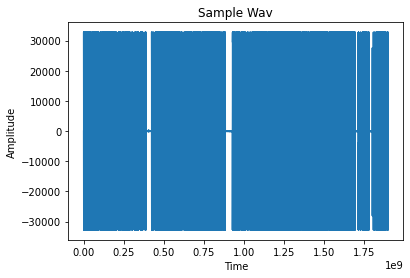

In [67]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

# read audio samples
input_data = read(outfile)
audio = input_data[1]
# plot the samples
plt.plot(audio)
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
# display the plot
plt.show()

In [16]:
sound = pydub.AudioSegment.from_mp3(filepath)

# get raw audio data as a bytestring
raw_data = sound.raw_data
# get the frame rate
sample_rate = sound.frame_rate
# get amount of bytes contained in one sample
sample_size = sound.sample_width
# get channels
channels = sound.channels

In [17]:
duration = channels/float(sample_rate)
duration

4.5351473922902495e-05

In [ ]:
import os
import scipy.io
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt


sampleRate, audioBuffer = scipy.io.wavfile.read(outfile)

duration = len(audioBuffer)/sampleRate

time = np.arange(0,duration,1/sampleRate) #time vector

plt.plot(time,audioBuffer)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title(myAudioFilename)
plt.show()